In [ ]:
#PABLO CUESTA SIERRA


En esta sesión vamos a ver dos formas distintas de aproximar una función: polinomios de Taylor y series (parciales) de Fourier. Esto nos servirá como excusa para practicar con algunas de las herramientas de Cálculo y de representación gráfica de Sage que se introdujeron en la primera hoja de referencia rápida.

**Ejemplo 1 (Gráficas).** Como calentamiento vamos a dibujar la funcion $\displaystyle f(x)=\frac{x^2+1}{|x-4|}$ junto con sus asíntotas oblicuas. Empezamos dibujando la función, para lo que será útil la función $\texttt{plot}$.

In [2]:
##Descomenta, ejecuta, infórmate y vuelve a comentar
#plot?

Representa la función en el intervalo $[-10,10]$ (intervalo que contiene al punto de discontinuidad).

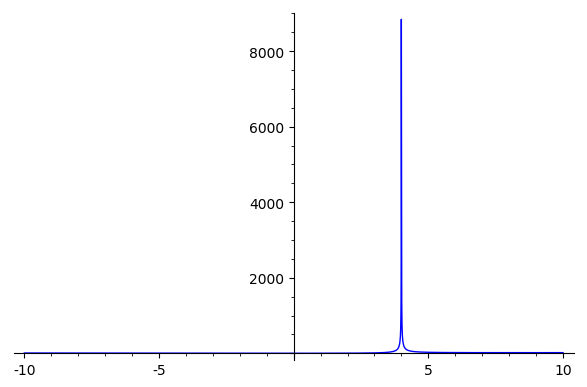

In [31]:
f(x)=(x^2+1)/abs(x-4) #Empezamos definiendo la función
plot(f,-10,10) #Uso sencillo de plot

Observará cómo el gran tamaño de la función cerca de la asíntota vertical $x=4$ hace que no se aprecie la función lejos de esta. 
Se pueden unir varias imágenes en una utilizando la "suma o unión" de imágenes. La sintaxis es sencilla, se utiliza la operación "+":

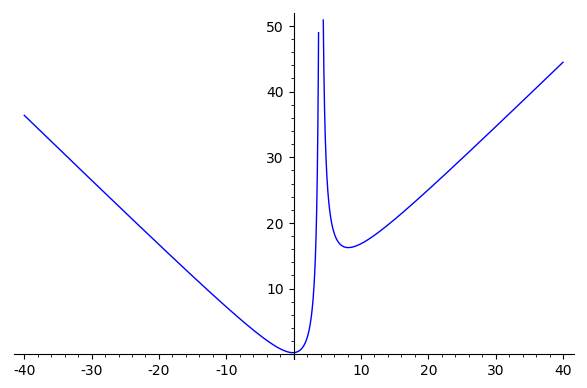

In [32]:
##Descomenta y ejecuta.
dibujo=plot(f,-40,3.7)+plot(f,4.4,40) # ¡Las gráficas se pueden sumar!
dibujo

Da la sensación de que la función tiene dos asíntotas oblicuas. Calculamos sus pendientes y sus ordenadas en el origen. 
La sintaxis de ${\tt limit}$ es muy intuitiva:

In [33]:
##Descomenta y ejecuta
m1=limit(f(x)/x,x=oo) #pendiente de la asíntota en +infty
n1=limit(f(x)-m1*x,x=oo) #ordenada en el origen de la asíntota en +infty
m2=limit(f(x)/x,x=-oo) #pendiente de la asíntota en -infty
n2=limit(f(x)-m2*x,x=-oo) #ordenada en el origen de la asíntota en -infty

Representa la gráfica de $f$ junto con sus asíntotas, incluyendo la vertical. Utiliza la imagen ya guardada como ${\tt dibujo}$ y la instrucción ${\tt line}$. Para distinguir marca las asíntotas en tres colores diferentes, por ejemplo rojo, verde y gris (utiliza color y/o rgbcolor).

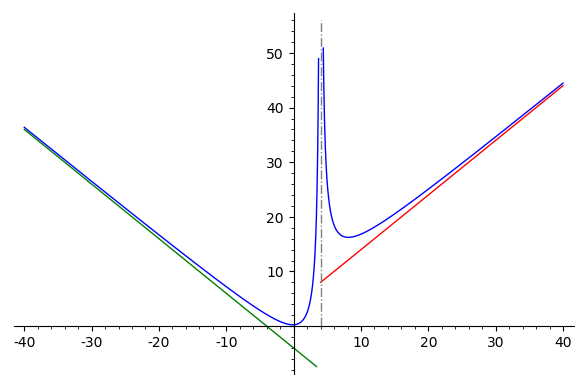

In [34]:
#las dos asíntotas:
a1(x)=m1*x+n1
a2(x)=m2*x+n2
dibujo+=plot(a1, (4, 40), color='red')+plot(a2,(-40, 3.4),color='green')
dibujo+=line([(4,0),(4,56)],rgbcolor=(.5,.5,.5), linestyle='-.')
dibujo.show()

**Ejemplo 2 (Animaciones).**  Una cicloide es una curva plana descrita por un punto de una circunferencia que  rueda sobre una línea recta.

Si la cicloide se genera mediante una circunferencia de radio r que se apoya sobre el eje de abscisas en el origen, su descripción en forma paramétrica viene dada por:
$$
x=r\left(t-\sin {t}\right)\qquad y=r\left(1-\cos {t}\right),
$$
donde $t$ es un parámetro real, correspondiente al ángulo girado por el círculo rodante. Para un  $t$ dado, el centro del círculo está en $x = r t$, $y = r$. 

Veamos un ejemplo con $r=1$ y $t\in [0,10]$.

<center>
<img src="Cicloide.gif">
</center>

¿Cómo hemos hecho este "dibujo animado"? La idea es sencilla: se trata de crear una **lista (ordenada) de gráficos**, y usar la instrucción **"animate"** para mostrarla en forma de película. Hemos usado también las instrucciones $\texttt{circle}$ (para dibujar círculos), $\texttt{line}$ (para dibujar líneas) y $\texttt{points}$ (para dibujar puntos).  Tomamos tiempos de la forma $t=i*0.05$ para $i=0,\dots,200$.

Consigue el .gif de arriba, modificando el color de los puntos de la cicloide en un degradado de rojos. Averigua el uso del método ${\tt .save}()$.

Animation with 200 frames
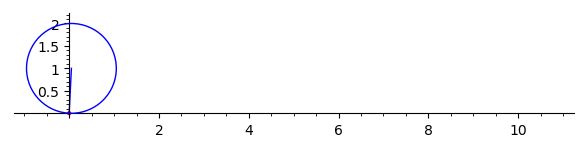

In [35]:
r=1
fotogramas=[]
L=[]
for j in [1..200]:
    t=j*0.05
    L+=[(r*(t-sin(t)), r*(1-cos(t)))] #lista de puntos de la cicloide
    fotogramas.append(circle((r*t,r), r) #círculo -centro, radio
                     +line([(r*t,r),L[-1]]) #línea que une el centro y el último punto dibujado
                     +points(L,color='red'))#puntos de la cicloide

movie=animate(fotogramas, xmin=-r, xmax=11*r, ymin=0, ymax=2.2*r)
show(movie)

In [36]:
movie.save('cicloide_.gif')

## **El polinomio de Taylor** ##

Recordemos que el polinomio de Taylor de orden $n$ centrado en $a$ para la función $f$ viene dado por $\displaystyle\sum_{j=0}^n \frac{f^{(j)}(a)}{j!}(x-a)^j$.

**Ejercicio 1.1**.- Programa una función ${\tt Tay}(f,a,n)$ que tome como argumentos una función $f$, un punto $a$ y un entero $n\ge 0$ y nos devuelva como resultado el polinomio de Taylor de orden $n$ para la función, centrado en $ x= a$. Recuerda que tienes a tu disposición las funciones $\texttt{diff}$ y $\texttt{derivative}$ para calcular derivadas.

In [37]:
def Tay(f,a,m):
    coeficientes=[((diff(f,j).substitute(x=a))/factorial(j)) for j in [0..m]]
    return sum([coeficientes[j]*(x-a)^j for j in [0..m]])

**Ejercicio 1.2**.- Halla el polinomio de Taylor de quinto orden, alrededor del 0, para la funci&oacute;n $ f(x)= x (\cos(x) + \sin(x))$. Representa gr&aacute;ficamente (con distintos colores) el polinomio y la funci&oacute;n en el intervalo $[-3,5]$.

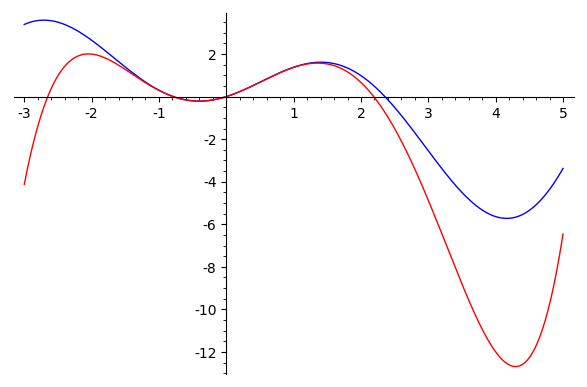

In [38]:
f(x)=x*(cos(x)+sin(x))
g(x)=Tay(f,0,5)
plot(f,(-3,5))+plot(g,(-3,5), color='red')

Podemos representar simultáneamente varias aproximaciones de distintos órdenes.
Para distinguir los diferentes polinomios de Taylor podemos intentar varias cosas:
- Cambiar los colores o el tipo de línea (hay que hacerlo automáticamente)
- Hacer una animación
- Colocar etiquetas en los gráficos (buscar esta opción en la ayuda de ${\tt plot}$.

**Ejercicio 1.3**.- Representa en el intervalo $[-3,5]$ la función $ f $ (en color verde)  y sus aproximaciones de Taylor alrededor de $ x=0 $ de ordenes entre 1 y 5, con colores que van variando del rojo para orden 1 al verde para orden 5. Puede ser útil usar las opciones ${\tt ymin}=-6$, ${\tt ymax}=5$ de ${\tt plot}$ para que los dos ejes tengan escalas similares.

Animation with 15 frames
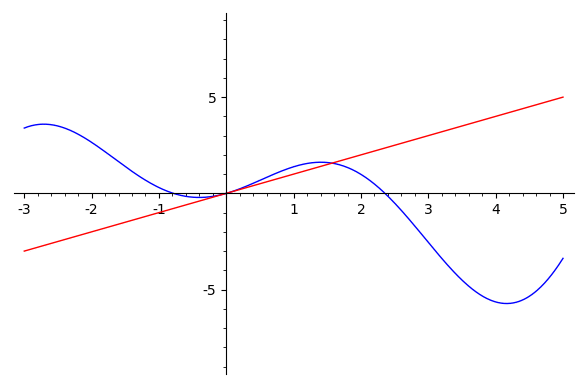

In [39]:
fotogramas2=[]
aux=plot(f,(-3,5))
j=1
maxim=5
while j<=maxim:
    t=(j-1)/(maxim-1)# para el color
    #Añado 3 fotogramas para que se vea bien la animación:
    fotogramas2+=3*[aux+plot(Tay(f,0,j),(-3,5), rgbcolor=(1-t,t,0))] 
    j+=1
movie2=animate(fotogramas2, xmin=-3, xmax=5, ymin=-9, ymax=9)
show(movie2)

In [40]:
movie2.save('prueba2.gif')

En realidad, el cálculo de polinomios de Taylor ya lo incorpora Sage de forma automática con el comando ${\tt taylor}$.

**Ejercicio 1.4**.- Busca la información sobre este comando, experimenta con su uso y compara los resultados con los obtenidos con tu función ${\tt Tay}$.



In [41]:
show(Tay(f,5,3))
show(taylor(f,x,5,3))

x |--> -1/3*(x - 5)^3*(4*cos(5) - sin(5)) - 1/2*(x - 5)^2*(3*cos(5) + 7*sin(5)) + 2*(x - 5)*(3*cos(5) - 2*sin(5)) + 5*cos(5) + 5*sin(5)

x |--> -1/3*(x - 5)^3*(4*cos(5) - sin(5)) - 1/2*(x - 5)^2*(3*cos(5) + 7*sin(5)) + 2*(x - 5)*(3*cos(5) - 2*sin(5)) + 5*cos(5) + 5*sin(5)

In [22]:
taylor?

Signature:      taylor(f, *args)
Docstring:     
   Expands self in a truncated Taylor or Laurent series in the
   variable v around the point a, containing terms through (x - a)^n.
   Functions in more variables are also supported.

   INPUT:

   * "*args" - the following notation is supported

   * "x, a, n" - variable, point, degree

   * "(x, a), (y, b), ..., n" - variables with points, degree of
     polynomial

   EXAMPLES:

      sage: var('x,k,n')
      (x, k, n)
      sage: taylor (sqrt (1 - k^2*sin(x)^2), x, 0, 6)
      -1/720*(45*k^6 - 60*k^4 + 16*k^2)*x^6 - 1/24*(3*k^4 - 4*k^2)*x^4 - 1/2*k^2*x^2 + 1

      sage: taylor ((x + 1)^n, x, 0, 4)
      1/24*(n^4 - 6*n^3 + 11*n^2 - 6*n)*x^4 + 1/6*(n^3 - 3*n^2 + 2*n)*x^3 + 1/2*(n^2 - n)*x^2 + n*x + 1

      sage: taylor ((x + 1)^n, x, 0, 4)
      1/24*(n^4 - 6*n^3 + 11*n^2 - 6*n)*x^4 + 1/6*(n^3 - 3*n^2 + 2*n)*x^3 + 1/2*(n^2 - n)*x^2 + n*x + 1

   Taylor polynomial in two variables:

      sage: x,y=var('x y'); taylor(x*y^3,(x,1),(y,

## **Series trigonométricas (series de Fourier)** ##

Los polinomios de Taylor son una herramienta muy eficaz, pero presentan desventajas importantes:

- Si queremos calcular el polinomio de grado $K$, necesitamos que la función tenga derivadas de orden $K$, por lo que muchas funciones muy interesantes e importantes en las aplicaciones quedan fuera de su alcance. Por ejemplo, en los experimentos aparecen muy frecuentemente funciones discontinua (nada más simple que encender y apagar varias veces un interruptor).

- El resultado que se obtiene es **local**: el polinomio de Taylor nos da una buena aproximación de la función **cuando estamos cerca del punto en el que hemos hecho los cálculos**. Si queremos encontrar una aproximación que sea válida en todo un intervalo, el problema se complica. 

Hay una herramienta alternativa que funciona muy bien en estos casos (funciones con menos regularidad, o búsqueda de aproximaciones uniformes en un intervalo): las series trigonométricas o series de Fourier. Aunque la teoría matemática que las justifica requiere técnicas  propias de cursos más avanzados (en particular, el curso de ecuaciones en derivadas parciales de tercero), su descripción es bastante simple: *dada una función $f(x)$, buscamos una aproximación como suma de funciones trigonométricas por ejemplo del tipo $\sin(nx)$*.

Para ser un poco más precisos: supongamos que tenemos una función $f(x)$ definida en el intervalo $(0, \pi)$. Queremos aproximarla por sumas trigonométricas de la forma
$$ f(x) \approx \sum_{k=1}^N a_k \sin(kx)=F_{f,N}(x)$$
Sorprendentemente, hay una fórmula bastante sencilla para calcular los coeficientes $a_k$:
$$a_k = \frac 2 \pi \int_0^{\pi} f(x) \sin(kx) \, dx .$$

**Ejercicio 2.1.**.- Vamos a aplicar lo anterior al caso de una función imposible de aproximar por Taylor: $f(x)=x$ si $x\in(0, \pi/2)$, $f(x)=\pi-x$ si $x\in(\pi/2, \pi)$. Calcula $F_{f,5}(x)$, y represéntala gráficamente junto a la función $f$. Recuerda que tienes a tu disposición la función ${\tt integral}$ para calcular integrales. 

(**Pregunta:** ¿Por qué es imposible la aproximación por Taylor?)

In [42]:
f1(x)=x
f2(x)=pi-x

In [43]:
SumFou=0
for k in [1..10]:
    ak=2/pi*(integral(f1(x)*sin(x*k),x,0,pi/2)+integral(f2(x)*sin(x*k),x,pi/2,pi))
    SumFou+=ak*sin(k*x)
SumFou.show()

4/81*sin(9*x)/pi - 4/49*sin(7*x)/pi + 4/25*sin(5*x)/pi - 4/9*sin(3*x)/pi + 4*sin(x)/pi

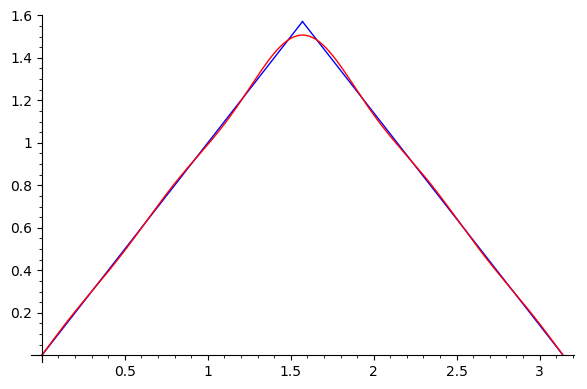

In [44]:
plot(f1,(0,pi/2))+plot(f2,(pi/2,pi))+plot(SumFou, (0, pi), color='red')

**Ejercicio 2.2**.- (*Convergencia puntual*)

La idea es que $F_{f,N}(x)$ aproxima a $f(x)$ para $N$ suficientemente grande.

Podemos investigar cómo aproximan los desarrollos de Fourier el valor de la función en el punto $x=\pi /2$, que según la gráfica anterior parece ser el peor de todos. Para ello,  Encuentra el número $N$ de términos que debemos añadir en la serie para que el error cometido en el punto $ \pi/2 $ sea menor que 0.005. Repite el cálculo para un valor $x$ *aleatorio entre $0$ y $1$* (consulta ${\tt random}$). 

In [45]:
SumFou=0
k=0
value=0.005
while abs(SumFou.substitute(x=pi/2)-pi/2)>=value:
    k+=1
    ak=2/pi*(integral(f1(x)*sin(x*k),x,0,pi/2)+integral(f2(x)*sin(x*k),x,pi/2,pi))
    SumFou+=ak*sin(k*x)
show(k)

127

In [51]:
SumFou=0
k=0
value=random()
show(value)
while abs(SumFou.substitute(x=pi/2)-pi/2)>=value:
    k+=1
    ak=2/pi*(integral(f1(x)*sin(x*k),x,0,pi/2)+integral(f2(x)*sin(x*k),x,pi/2,pi))
    SumFou+=ak*sin(k*x)
show(k)

0.12226879714022365

5

**Ejercicio 2.3**.- Otra función imposible de tratar con el polinomio de Taylor: consideramos la función **impar** que vale $h(x)=1$ si $x \in (0, \pi)$ (y por tanto, $h(x)=-1 $ si $ x \in (-\pi, 0 )$. )

a) Encuentra el desarrollo de Fourier de orden 20 de $h$.

b) Representa gráficamente, en el intervalo $(-\pi, \pi)$, la función $h$ y el desarrollo de Fourier anterior.

In [52]:
h1(x)=1 #para x entre 0 y pi
h2(x)=-1 #para x entre -pi y 0

In [53]:
SumFouH=0
orden=20
for k in [1..orden]:
    ak=2/pi*(integral(h1(x)*sin(x*k),x,0,pi))
    SumFouH+=ak*sin(k*x)
show(SumFouH)

4/19*sin(19*x)/pi + 4/17*sin(17*x)/pi + 4/15*sin(15*x)/pi + 4/13*sin(13*x)/pi + 4/11*sin(11*x)/pi + 4/9*sin(9*x)/pi + 4/7*sin(7*x)/pi + 4/5*sin(5*x)/pi + 4/3*sin(3*x)/pi + 4*sin(x)/pi

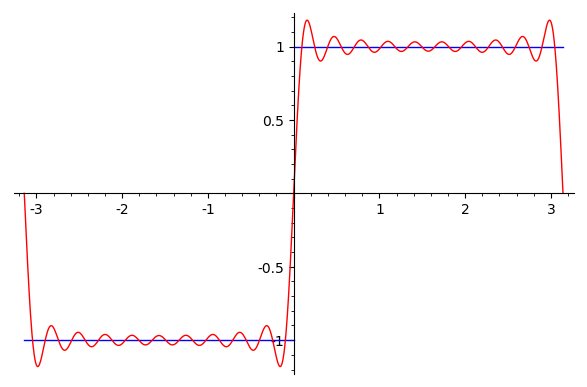

In [54]:
plot(h1,(0,pi))+plot(h2,(-pi,0))+plot(SumFouH, (-pi, pi), color='red')

En este caso, las sumas de Fourier siempre valen $0$ en el punto $x=0$. Además, la oscilación más brusca siempre es la primera, la que está más próxima a $ x= 0$. Esta particularidad se conoce con el nombre de **fenómeno de Gibbs**.

**Ejercicio 2.4**.- Hacer una **animación** en la que aparezcan la función $h$ (en color verde)  y sus desarrollos de Fourier de orden 10, 15, 20, 25, ..., 60 con colores que van pasando del azul para orden 10 al rojo para orden 60.

Animation with 11 frames
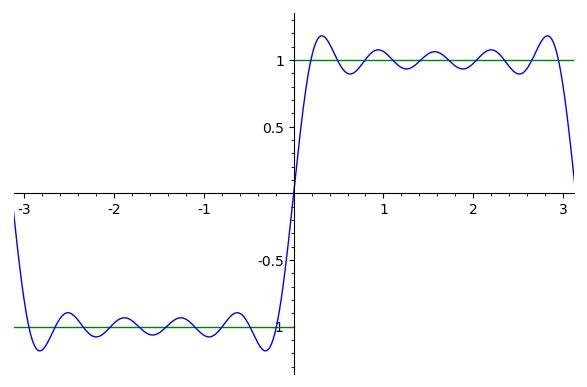

In [55]:
fotogramas3=[]
SumFouHaux=0
plotH=plot(h1,(0,pi),color='green')+plot(h2,(-pi,0),color='green')
orden=60
for k in [1..orden]:
    ak=2/pi*(integral(h1(x)*sin(x*k),x,0,pi))
    SumFouHaux+=ak*sin(k*x)
    if k%5==0 and k!=5:
        t=(k-10)/(orden-10)
        fotogramas3+=[plotH+plot(SumFouHaux,(-pi,pi),rgbcolor=(t,0,1-t))]
        
movie3=animate(fotogramas3, xmin=-3, xmax=3, ymin=-1.3, ymax=1.3)
show(movie3)

In [56]:
movie3.save('fou.gif')

## Dinámica de poblaciones

En esta segunda parte vamos a aplicar Álgebra Lineal elemental para estudiar modelos sencillos que describen cómo evoluciona una población.

**Ejercicio 3.1**.- Estamos interesados en estudiar la población de cierta especie en un hábitat. Para ello se dividen los individuos en dos clases de edad:
- Clase $X$: individuos jóvenes de menos de $1$ año. Estos individuos no tiene descendencia y sobrevive un $60\%$ al cabo de un año.
- Clase $Y$: individuos adultos de más de $1$ año. Cada uno de estos individuos tiene, en promedio, $3.5$ crías cada año. Al final del año, solo un $20\%$ consigue sobrevivir una temporada más.

Denotamos por $X_n$, $Y_n$ la población de la clase $X$ y de la clase $Y$, respectivamente, en el año $n$. A la vista de los datos, la población de dos años consecutivos está relacionada por una expresión de la forma
$$
\begin{array}{l}
X_{n+1}=AX_n+BY_n\\
Y_{n+1}=CX_n+DY_n
\end{array}
\quad\Longleftrightarrow\quad
\begin{pmatrix}X_{n+1}\\Y_{n+1}\end{pmatrix}=
\begin{pmatrix}A&B\\C&D\end{pmatrix}\begin{pmatrix}X_n\\Y_n\end{pmatrix}
$$
Sabiendo que en el instante inicial $X_0=10$, $Y_0=15$, se pide:

a) Escribe una matriz $M$ con los valores correctos de $A,B,C$ y $D$ y los vectores $(X_0,Y_0)$ y $(X_1,Y_1)$.

<p><span style="color: #ff0000;"><strong>Para evitar problemas con los cálculos que haremos más adelante, tendremos en cuenta la siguiente advertencia de SAGE:</strong></span>&nbsp;


For computing eigenvalues and eigenvectors of matrices over floating point real or complex numbers, the matrix should be defined over RDF (Real Double Field) or CDF (Complex Double Field), respectively. If no ring is specified and floating point real or complex numbers are used then by default the matrix is defined over the RR or CC fields, respectively, which do not support these computations for all the cases.

In [57]:
M=matrix(RDF,[[0, 3.5],[.6, .2]])
show(M.n(digits=2))

[0.00  3.5]
[0.60 0.20]

In [58]:
M=matrix(RDF,2,[0, 3.5,.6, .2])
show(M.n(digits=2))
show(matrix(RDF, 2, [j for j in range(16)]))

[0.00  3.5]
[0.60 0.20]

[ 0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0]
[ 8.0  9.0 10.0 11.0 12.0 13.0 14.0 15.0]

b) Calcula una lista con los valores de $ X_n$ y de $ Y_n$ para $n= 0, 1, \dots, 50$, y represéntalos gráficamente en un diagrama de puntos, con un color distinto para cada una de las dos clases de edad.

In [59]:
XY=[vector((10,15))]
for j in range(50):
    XY+=[vector(M*XY[-1])]
XY[-2:]

[(52302711894.42035, 23173001684.20417), (81105505894.7146, 36016227473.49304)]

In [60]:
M.eigenvalues()

[-1.3525839046333952, 1.5525839046333947]

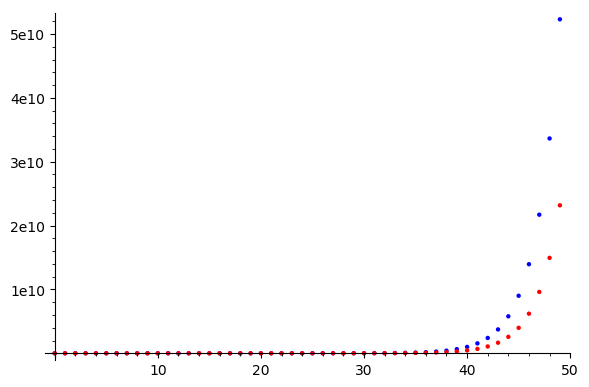

In [61]:
points([(j,XY[j][0]) for j in range(50)])+points([(j,XY[j][1]) for j in range(50)], color='red')

c) Representa gráficamente las listas con  los cocientes $CX_n=\frac{X_{n+1}}{X_n}$ , $CY_n=\frac{Y_{n+1}}{Y_n}$, para $n=0,1,\dots, 49$. ¿Qué se aprecia?

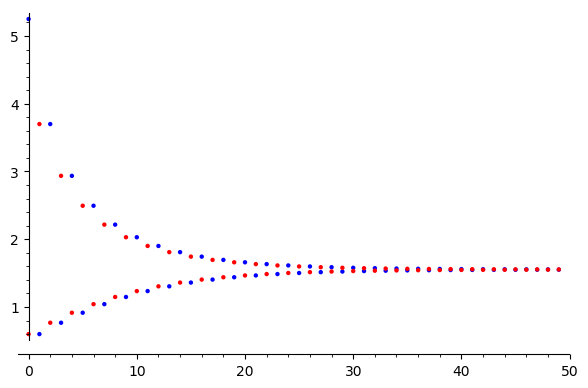

In [62]:
CX=[XY[j+1][0]/XY[j][0] for j in range(50)]
CY=[XY[j+1][1]/XY[j][1] for j in range(50)]
points([(j,CX[j]) for j in range(50)])+points([(j,CY[j]) for j in range(50)], color='red')

Si lo has hecho bien, deberías haber observado que el ritmo de crecimiento (proporción respecto al año anterior) tiende a hacerse constante, e idéntico en ambas clases. Asintóticamente tendremos por tanto un comportamiento exponencial, con la misma base para ambas componentes, 
$X_n\approx C \lambda^n$, $Y_n\approx D\lambda^n$.  Compruébalo representando los puntos en escalas semilogarítmicas. Los puntos se dispondrán asintóticamente sobre rectas de pendiente $\log\lambda$.

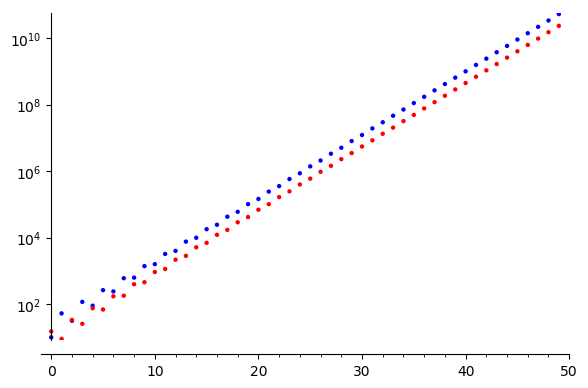

In [63]:
points([(j,(XY[j][0])) for j in range(50)], scale='semilogy')+points([(j,(XY[j][1])) for j in range(50)], color='red', scale='semilogy' )

Nuestro siguiente objetivo es comprobar que el ritmo de crecimiento (de ambas clases) no depende del dato inicial. Puesto que el problema es lineal, basta con que comprobemos esta conjetura para datos iniciales en la intersección de la circunferencia unidad con el primer cuadrante (en el caso de poblaciones solo tienen sentido los datos no negativos). 


d) Calcula el cociente $ CX_{50}(\theta)=\frac{X_{50}(\theta)}{X_{49}(\theta)}$ para $\theta=i\frac\pi{100}$ con $i=0,\dots,50$, siendo $X_n(\theta)$ e $Y_n(\theta)$ las poblaciones en tiempo $n$ en las clases $X$ e $Y$ cuando los datos iniciales son $(X_0,Y_0)=(\cos\theta,\sin\theta)$. Representa la función $CX_{50}(\theta)$ así obtenida.
    
Haz lo mismo para el cociente $CY_{50}(\theta)$.

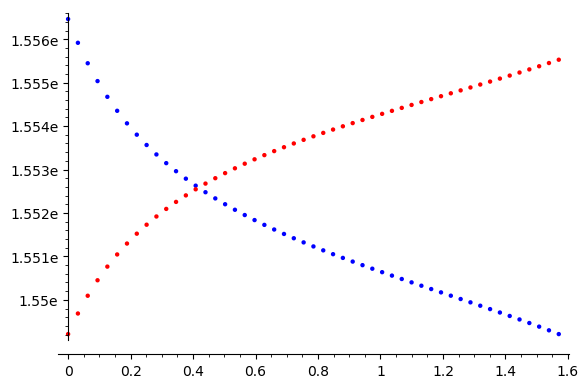

In [64]:
puntosCX=[]
puntosCY=[]
for j in range(51):
    z=j*pi/100
    v=vector((cos(z),sin(z)))
    v49=M^49*v
    v50=M*v49
    puntosCX+=[(z, (v50[0]/v49[0]))]
    puntosCY+=[(z, (v50[1]/v49[1]))]
points(puntosCX)+points(puntosCY, color='red')

e) Representa en otra gr&aacute;fica los cocientes $ TX_n=\frac{X_{n}}{X_n+Y_n }$, $TY_n=\frac{Y_{n}}{X_n+Y_n}$, que nos indican la **proporción** de individuos en cada clase de edad, para una población inicial $ X_0=10$, $Y_0=15$. ¿Qué se aprecia?

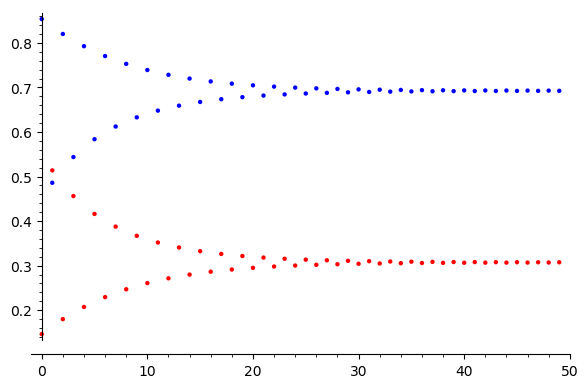

In [67]:
TX=[XY[j][0]/(XY[j][0]+XY[j][1]) for j in [1..50]]
TY=[XY[j][1]/(XY[j][0]+XY[j][1]) for j in [1..50]]
points([(j,TX[j]) for j in range(50)])+points([(j,TY[j]) for j in range(50)], color='red')

f) Programa una animación en la que se vea cómo va cambiando con $n$ el vector con la proporción de individuos en cada clase de edad en el tiempo $n$,
$$ \left(\frac{X(n)}{X(n)+Y(n)}, \frac{Y(n)}{X(n)+Y(n)}\right).$$

In [70]:
fotogramas4=[]
for j in range(50):
    t=j/50
    fotogramas4+=[plot(vector((TX[j],TY[j])),rgbcolor=(t,0,1-t))]

Animation with 50 frames
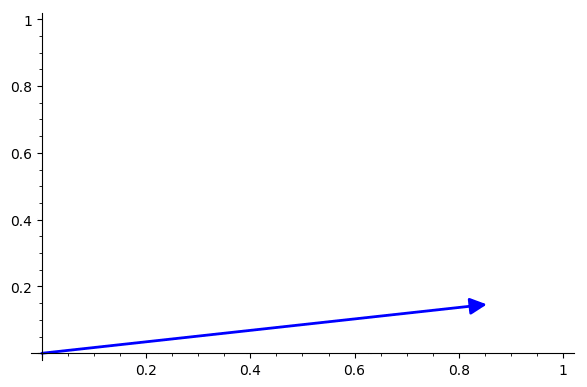

In [72]:
movie4=animate(fotogramas4,xmax=1,ymax=1,xmin=0,ymin=0)
show(movie4)

e) Repite los apartados anteriores con otros valores iniciales distintos $X_0$, $Y_0$.

In [74]:
XY2=[vector((30,2))]
for j in range(50):
    XY2+=[vector(M*XY2[-1])]

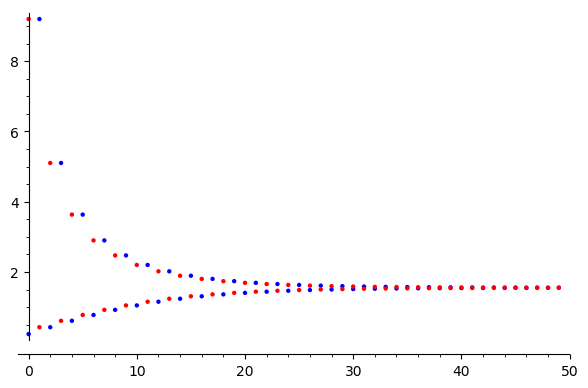

In [75]:
CX2=[XY2[j+1][0]/XY2[j][0] for j in range(50)]
CY2=[XY2[j+1][1]/XY2[j][1] for j in range(50)]
points([(j,CX2[j]) for j in range(50)])+points([(j,CY2[j]) for j in range(50)], color='red')

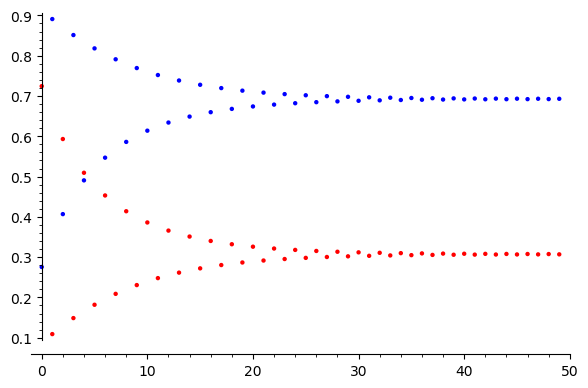

In [76]:
TX2=[XY2[j][0]/(XY2[j][0]+XY2[j][1]) for j in [1..50]]
TY2=[XY2[j][1]/(XY2[j][0]+XY2[j][1]) for j in [1..50]]
points([(j,TX2[j]) for j in range(50)])+points([(j,TY2[j]) for j in range(50)], color='red')

Nuestro siguiente objetivo es comprobar que la proporción límite de individuos en cada clase de edad no depende del dato inicial.  

g) Calcula las proporciones $ TX_{50}(\theta)=\frac{X_{50}(\theta)}{X_{50}(\theta)+Y_{50}(\theta)}$ y $TY_{50}(\theta)=\frac{Y_{50}(\theta)}{X_{50}(\theta)+Y_{50}(\theta)}$ para $\theta=i\frac\pi{100}$ con $i=0,\dots,50$, donde $X_n(\theta)$ e $Y_n(\theta)$ tienen el mismo significado que en el apartado d).  Representa las función $TX_{50}(\theta)$ y $TY_{50}(\theta)$ así obtenidas en una misma gráfica, usando para cada una un color. 

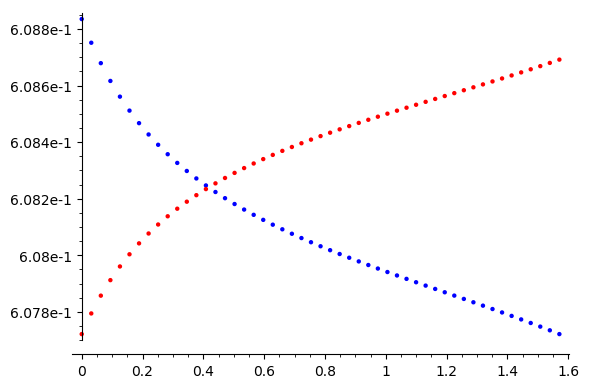

In [78]:
puntosTX=[]
puntosTY=[]
for j in range(51):
    z=j*pi/100
    v=vector((cos(z),sin(z)))
    v49=M^49*v
    v50=M*v49
    puntosTX+=[(z, (v50[0]/(v49[0]+v50[0])))]
    puntosTY+=[(z, (v50[1]/(v49[1]+v50[1])))]
points(puntosTX)+points(puntosTY, color='red')

h) Calcula el autovalor de la matriz $M$ de mayor valor absoluto, conocido como el  *autovalor dominante*, y comprueba que es positivo.  Utiliza un bucle while para obtener el primer cociente $CX_n$ tal que la diferencia $|CX_{n} - CX_{n-1}| < 10^{-6}$ y comprueba que dicho cociente, que aproxima al límite común de $CX_n$ y $CY_n$, difiere del autovalor dominante en una cantidad menor que $10^{-6}$.

In [82]:
autovalores=M.eigenvalues()
maxim=autovalores[0]
for m in autovalores:
    if abs(m)>abs(maxim):
        maxim=m
maxim, maxim>0

(1.5525839046333947, True)

In [85]:
CX=[XY[1][0]/XY[0][0]]
CY=[XY[1][1]/XY[0][1]] #insertamos el elemento correspondiente a n=1 y n=2
CX+=[XY[2][0]/XY[1][0]]
CY+=[XY[2][1]/XY[1][1]]

last=vector(XY[2])
while abs(CX[-1]-CX[-2])>=10**(-6):
    new=vector(M*last)
    CX+=[new[0]/last[0]]    
    CY+=[new[1]/last[1]]
    last=new
print CY[-1],CX[-1],maxim

1.552583538643064 1.552584324741049 1.5525839046333947


In [86]:
print abs(CY[-1]-maxim)<10**6,abs(CX[-1]-maxim)<10**6

True True


i) Calcula los autovectores de la matriz $M$. Comprueba que el vector límite de las proporciones obtenido en e) y f) es (aproximadamente) un autovector de $M$ asociado al autovalor dominante. 

In [95]:
Aut=M.eigenvectors_right()
print Aut[1],'\n',Aut[1][1],'\n'
v=vector((TX[49],TY[49]))
print M*v,'\n',maxim*v

(1.5525839046333947, [(-0.9140993595414798, -0.40549027224565615)], 1) 
[(-0.9140993595414798, -0.40549027224565615)] 

(1.0762886829972702, 0.47699557908602624) 
(1.0751471943589272, 0.4774367102744674)


Se puede comprobar con otras matrices cuadradas  $M$, de distintos tamaños, con sentido biol&oacute;gico (no se admiten tasas de supervivencia mayores del 100%, ni n&uacute;meros negativos de descendientes) que en todos los casos el autovalor dominante da la tasa de crecimiento asintótica de todas las clases, independientemente del dato inicial, y que el correspondiente autovalor (estandarizado) da la proporción asintótica de individuos en cada clase, también independientemente del dato inicial.

**Ejercicio 3.2.-** En una granja de cría de cerdos, los animales son clasificados según sus edades de la siguiente forma:
- Cochinillos: De 0 a 1 a&ntilde;o.
- Lechones: De 1 a 2 años.
- Jóvenes: De 2 a 3 años.
- Adultos: De 3 a 4 años.

El procedimiento de gestión de las hembras de la granja es el siguiente:
- Se sacrifica al $60\%$ de las que van naciendo para su consumo como cochinillos.
- Se sacrifica para su consumo a todas las hembras cuando llegan a los 4 años. No se sacrifica a ninguna de las demás, y se supone que ningún animal muere por otras causas.
- Se dedica a todas las hembras jóvenes y adultas a la cría. Se sabe que, en media, cada hembra joven tendrá $0.5$ camadas de $5$ cochinillos, cada hembra adulta tendrá $0.8$ camadas de $5$ cochinillos, y que el $50\%$ de todos los nuevos nacidos serán hembras.

a) Formula el modelo apropiado para describir la evolución de la población de las hembras.


$$0.5\times5\times50\%=1.25$$
$$0.8\times5\times50\%=2$$
$$C_{n+1}=1.25\times J_n + 2\times A_n$$
$$L_{n+1}=0,40\times C_n$$
$$J_{n+1}=L_n$$
$$A_{n+1}=J_n$$

In [100]:
Mat=matrix(RDF,4,[0,0,1.25,2,
                  0.4,0,0,0,
                  0,1,0,0,
                  0,0,1,0])
show(Mat)

[ 0.0  0.0 1.25  2.0]
[ 0.4  0.0  0.0  0.0]
[ 0.0  1.0  0.0  0.0]
[ 0.0  0.0  1.0  0.0]

b) Comprueba que el autovalor dominante es mayor que 1, y que por tanto la población crece sin límite, por lo que la granja no es sostenible con la tasa de sacrificio dada.  

In [102]:
Mat.eigenvalues()

[1.0754540935520083,
 -0.13962166252991245 + 0.956436488350355*I,
 -0.13962166252991245 - 0.956436488350355*I,
 -0.796210768492183]

c) Se aumenta la tasa de sacrificio al 80%. Comprobar que el autovalor dominante pasa a ser menor que 1, y que por tanto la población tiende a 0 asintóticamente, de forma que la granja tampoco es sostenible. 

In [103]:
Mat2=matrix(RDF,4,[0,0,1.25,2,
                  0.2,0,0,0,
                  0,1,0,0,
                  0,0,1,0])
show(Mat2)
Mat2.eigenvalues()

[ 0.0  0.0 1.25  2.0]
[ 0.2  0.0  0.0  0.0]
[ 0.0  1.0  0.0  0.0]
[ 0.0  0.0  1.0  0.0]

[0.8880777493502817,
 -0.09877417839903671 + 0.8015689638160883*I,
 -0.09877417839903671 - 0.8015689638160883*I,
 -0.6905293925522094]

d) Determinar una tasa de sacrificio que haga que la granja sea sostenible, esto es, que tenga autovalor dominante igual a 1. *Indicación.* Poner la tasa de sacrificio $t$ como un parámetro, calcular el polinomio característico y calcular $t$ que haga que 1 sea autovalor. Asegúrate de que 1 no solo es autovalor, sino que además es el autovalor dominante.

In [108]:
var('t')
Mt=matrix(     4,[0,0,1.25,2,
                  1-t,0,0,0,
                  0,1,0,0,
                  0,0,1,0])
show(Mt)

[               0                0 1.25000000000000                2]
[          -t + 1                0                0                0]
[               0                1                0                0]
[               0                0                1                0]

In [138]:
var('x')
var('t')
Mt=matrix(     4,[0,0,1.25,2,
                  1-t,0,0,0,
                  0,1,0,0,
                  0,0,1,0])
Pol=det(Mt-x*identity_matrix(4))
q,r = Pol.maxima_methods().divide(x-1)
solve(r==0,t)

[t == (9/13)]

In [143]:
Msol=matrix(RDF,4,[0,0,1.25,2,
                  4/13,0,0,0,
                  0,1,0,0,
                  0,0,1,0])
show (Msol)

Msol.eigenvalues()


[               0.0                0.0               1.25                2.0]
[0.3076923076923077                0.0                0.0                0.0]
[               0.0                1.0                0.0                0.0]
[               0.0                0.0                1.0                0.0]

[1.0000000000000009,
 -0.12248302650801246 + 0.8944496756842513*I,
 -0.12248302650801246 - 0.8944496756842513*I,
 -0.7550339469839744]

e) Comprobar que con la tasa de sacrificio obtenida en d) la explotación es sostenible, con una población total que se estabiliza a una cantidad no nula y una proporción de individuos por clase dada por el autovector estandarizado asociado al autovalor dominante.

In [ ]:
#Para diferentes valores iniciales:

In [164]:
aux=Msol^150*vector((10,10,10,10))
s=sum(aux)
print aux[0]/s,aux[1]/s,aux[2]/s,aux[3]/s
Msol*vector(aux),1*aux

0.5200000002113933 0.16000001922899404 0.15999999899558123 0.1599999815640314


((26.276593502577835, 8.085106289204159, 8.085107257595235, 8.085106235162154),
 (26.276595439913514, 8.085107257595235, 8.085106235162154, 8.08510535431257))

In [165]:
aux=Msol^150*vector((123,232,104,2))
s=sum(aux)
print aux[0]/s,aux[1]/s,aux[2]/s,aux[3]/s
Msol*vector(aux),1*aux

0.5200000642972892 0.16000000276071005 0.1599999477629861 0.1599999851790147


((337.17017383076313, 103.74470063992722, 103.74468960209464, 103.74465394133401),
 (337.1702770797634, 103.74468960209464, 103.74465394133401, 103.7446782020478))

In [166]:
aux=Msol^150*vector((1,1,1,1))
s=sum(aux)
print aux[0]/s,aux[1]/s,aux[2]/s,aux[3]/s
Msol*vector(aux),1*aux

0.5200000002113931 0.160000019228994 0.15999999899558123 0.1599999815640314


((2.6276593502577836, 0.8085106289204157, 0.8085107257595234, 0.8085106235162154),
 (2.627659543991351, 0.8085107257595234, 0.8085106235162154, 0.8085105354312572))